In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from display import plot_event, multiple_plots, display_timeline, show_densities
from problem import get_train_data
from problem import turn_prediction_to_event_list

In [5]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)
no_events = turn_prediction_to_event_list(labels_train == 0)

In [6]:
len(events)

412

In [10]:
s = pd.Series(events)
s.resample('1 A').sum()
s.plot(kind='bar')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [3]:
data_train = data_train.drop(columns=['Range F 14'])

In [ ]:
data = data_train.copy()
data['label'] = labels_train
data = data[['label', 'B', 'Bx', 'Bx_rms', 'By', 'By_rms', 'Bz', 'Bz_rms', 'Na_nl', 'Np',
       'Np_nl', 'Range F 0', 'Range F 1', 'Range F 10', 'Range F 11',
       'Range F 12', 'Range F 13', 'Range F 2', 'Range F 3',
       'Range F 4', 'Range F 5', 'Range F 6', 'Range F 7', 'Range F 8',
       'Range F 9', 'V', 'Vth', 'Vx', 'Vy', 'Vz', 'Beta', 'RmsBob',
        ]]


# ---- Fin du programme d'initialiastion de la bdd -------
# data_train : données sans les labels
# data : données avec les labels

## Tests de corrélation

In [33]:
pearson_corr =  data_train.corr('pearson') # Covariance
spearman_corr = data_train.corr('spearman')

In [5]:
cols = ['Beta', 'Pdyn', 'RmsBob', 'Vth']
v1_data_train = data_train[cols]

v1_pearson_corr = v1_data_train.corr('spearman')
v1_pearson_corr

,Beta,Pdyn,RmsBob,Vth
Beta,1.000000,0.306850,0.524559,0.432414
Pdyn,0.306850,1.000000,0.160890,0.176247
RmsBob,0.524559,0.160890,1.000000,0.525744
Vth,0.432414,0.176247,0.525744,1.000000


In [4]:
# spearman_corr

In [132]:
pearson_corr_label = pearson_corr['label']
p_id = pearson_corr_label.sort_values(ascending=False)
p_abs = pearson_corr_label.map(abs).sort_values(ascending=False)
p_abs[:14]

label         1.000000
RmsBob        0.216452
Vth           0.197110
B             0.147932
Bz_rms        0.099212
Range F 9     0.095855
By_rms        0.094852
Range F 7     0.092907
Range F 11    0.091129
Bx_rms        0.090558
Range F 12    0.070353
Range F 5     0.059334
Range F 4     0.055472
Range F 6     0.054311
Name: label, dtype: float64

In [62]:
index_labels_train = labels_train.reset_index()

In [36]:
(index_labels_train['label'] == 1).index

RangeIndex(start=0, stop=509834, step=1)

In [38]:
labels_train.value_counts()

0    451269
1     58565
Name: label, dtype: int64

In [47]:
one_value_index = np.argmax(labels_train == 1)
labels_train.iloc[one_value_index:(one_value_index + 5)]

1997-10-01 13:40:00    1
1997-10-01 13:50:00    1
1997-10-01 14:00:00    1
1997-10-01 14:10:00    1
1997-10-01 14:20:00    1
Name: label, dtype: int64

In [53]:
i = np.argmax(labels_train == 1)
while (labels_train.iloc[i] == 1):
    i += 1
i

337

In [27]:
def consecutive_plots(data, events, n_events, delta=36, figsize=(10, 60)):
    rng = np.random.RandomState(1)
    random_index = rng.randint(0, len(events) - n_events)
    for i in range(random_index, random_index + n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

In [28]:
def multiple_plots(data, n_events, events, delta=36, figsize=(10, 60)):
    rng = np.random.RandomState(1)

    for i in rng.randint(0, len(events), n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)


In [29]:
events = turn_prediction_to_event_list(labels_train)

In [ ]:
# plot_event(pd.Timestamp("2001-10-31 22:00:00"), pd.Timestamp("2001-11-02 05:30:00"), data_train);

In [ ]:
df =  data_train[data_train.columns[:7]]
multiple_plots(df, n_events=20, events=events, figsize=(10, 10))

In [151]:
keept_cols = p_abs[p_abs > 0.12][1:].index
corr_data_df = data_train[keept_cols]

In [ ]:
for i in rng.randint(0, len(events), 5):
    plot_event(events[i].begin, events[i].end, corr_data_df, figsize=(10, 8))

In [ ]:
data_train['Beta'].describe()

In [19]:
def compute_rolling_std(data, feature, time_window, center=False):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (time_window) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling mean from
    time_indow : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = '_'.join([feature, time_window, 'std'])
    data[name] = data[feature].rolling(time_window, center=center).std()
    data[name] = data[name].ffill().bfill()
    data[name].astype(data[feature].dtype)
    return data

In [20]:
X_df_new = data_train.copy()

In [ ]:
X_df_new = compute_rolling_std(X_df_new, 'Beta', '2h', center=True)
X_df_new.head()

In [3]:
events = turn_prediction_to_event_list(labels_train)

In [44]:
data = data_train[['Na_nl', 'Np', 'V', 'Pdyn', 'B', 'RmsBob', 'Beta', 'Vth']]

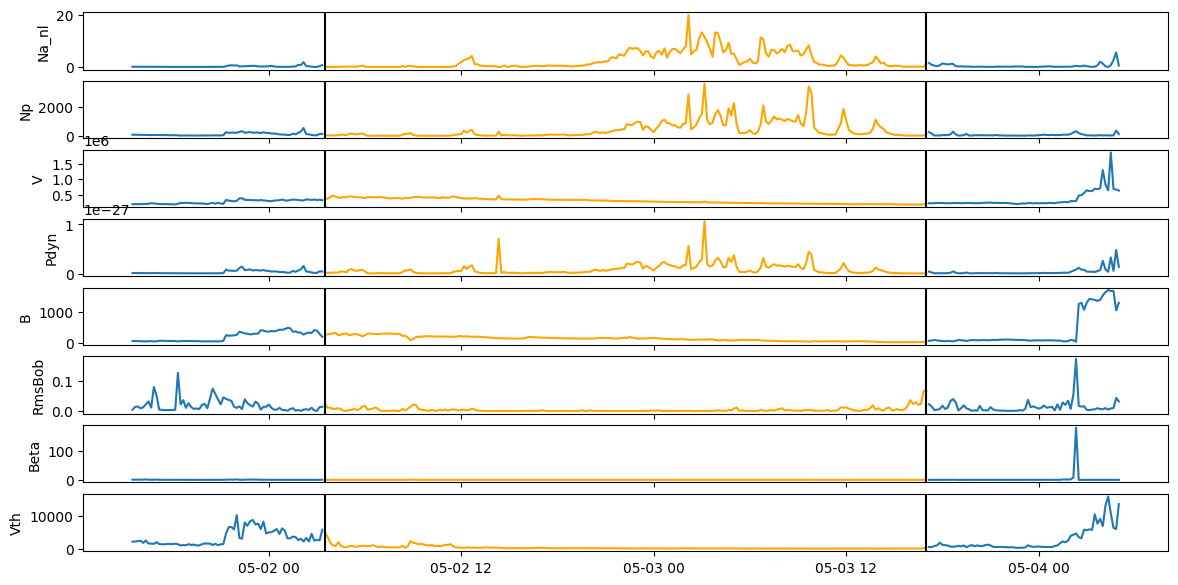

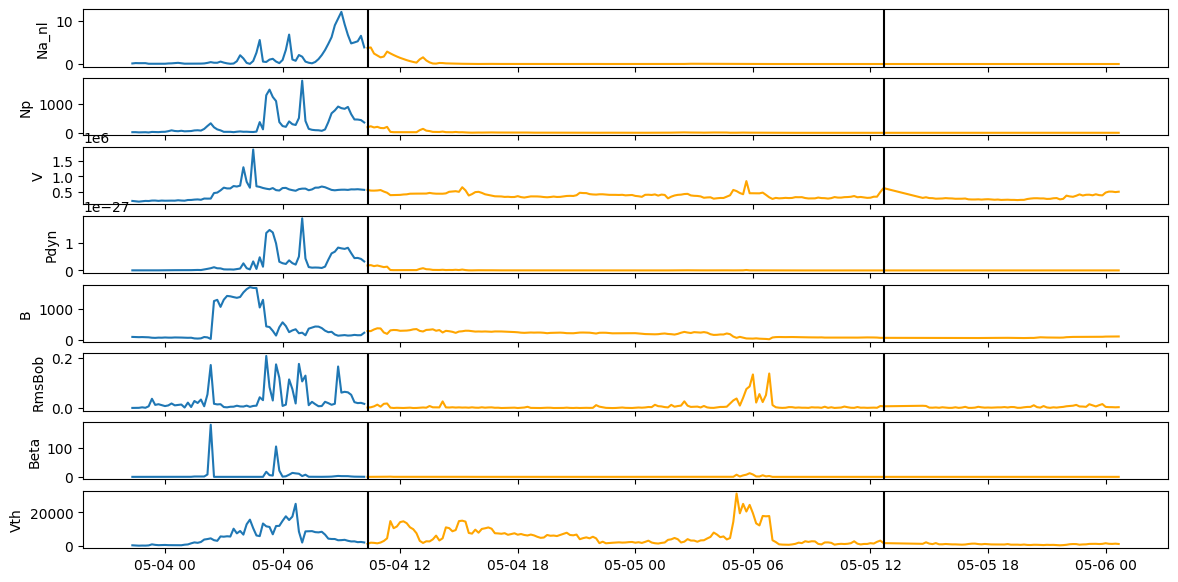

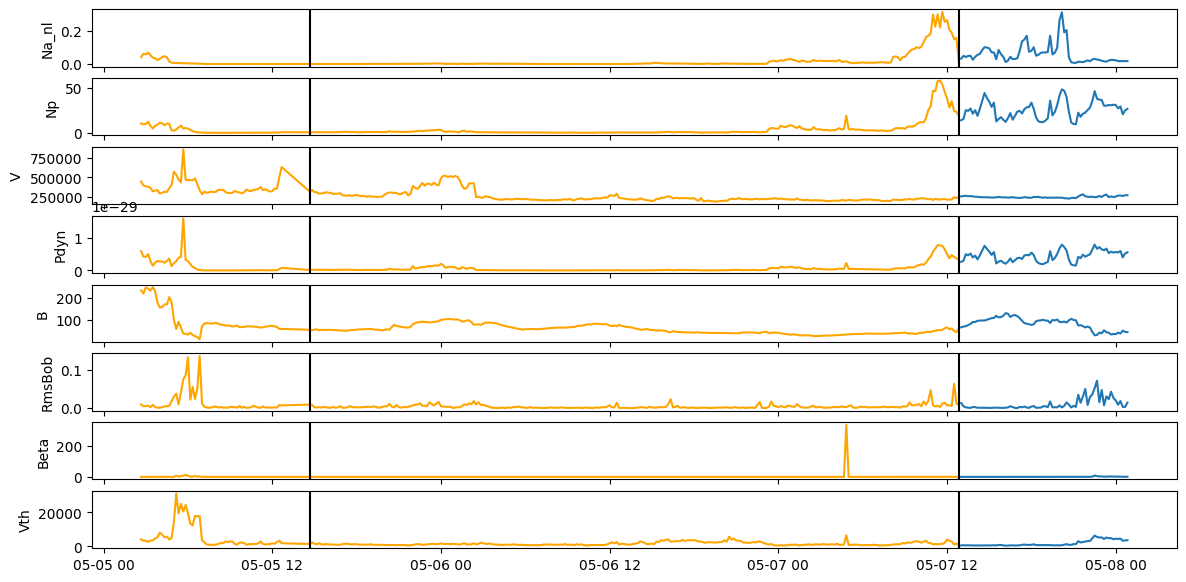

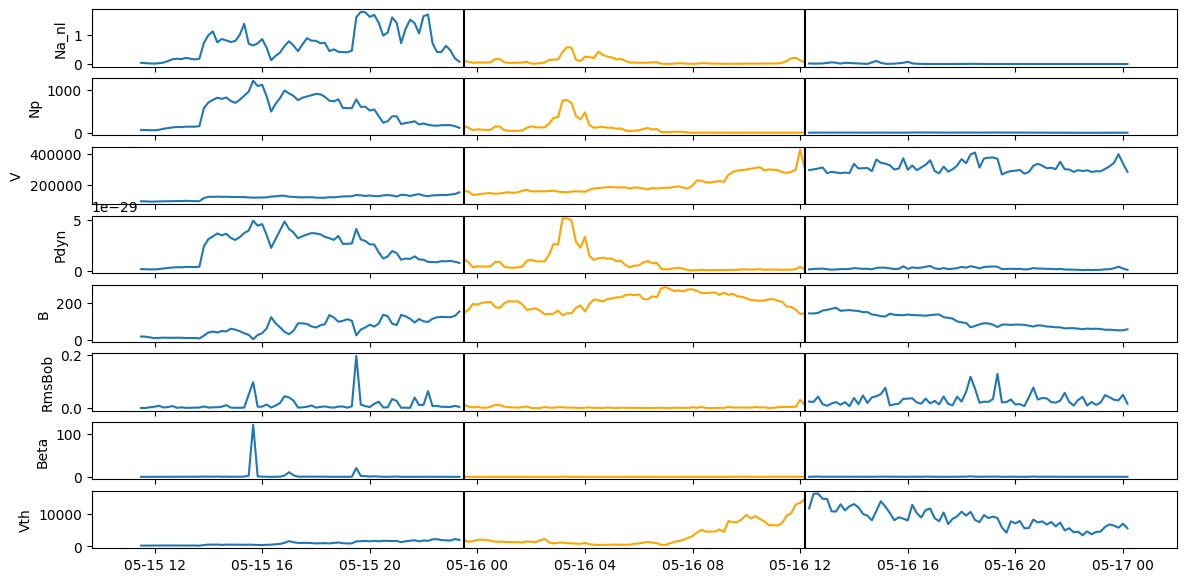

In [45]:
consecutive_plots(data, events, n_events=4, delta=12, figsize=(14, 7))

In [55]:
data_train['V'].describe()

count    509834.000000
mean        446.682709
std         119.234520
min          27.204723
25%         363.626076
50%         422.142212
75%         508.262398
max       10663.779297
Name: V, dtype: float64

In [58]:
data_train['V'][data_train['V'] > 1000].count()

597

label
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: V, dtype: object

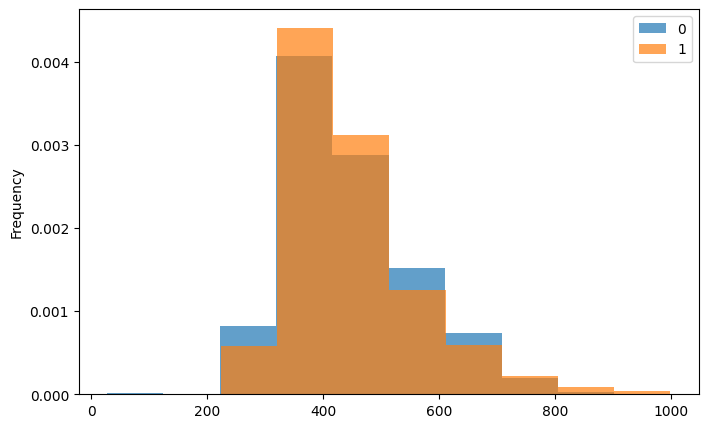

In [73]:
_, ax = plt.subplots(figsize=(8, 5))

df = data_train.copy()
df['label'] = labels_train
df = df.drop(df[df['V'] > 1000].index)
df.groupby(['label'])['V'].plot.hist(ax=ax, alpha=0.7, legend=True, density=True)

In [ ]:
max_df = data_train['V']

In [11]:
df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})
df

,A,B
0,1,10
1,2,20


In [17]:
def sum(x):
    return x['A'], x['B']

In [19]:
df['path'] = df.apply(sum, axis=1)
df

,A,B,path
0,1,10,"(1, 10)"
1,2,20,"(2, 20)"
